In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.fft import rfft,rfftfreq
from scipy.optimize import curve_fit


In [ ]:
f=np.loadtxt("/content/pulsar_dat.txt")
#print(f)

Text(0.5, 1.0, 'Pulsar Data')

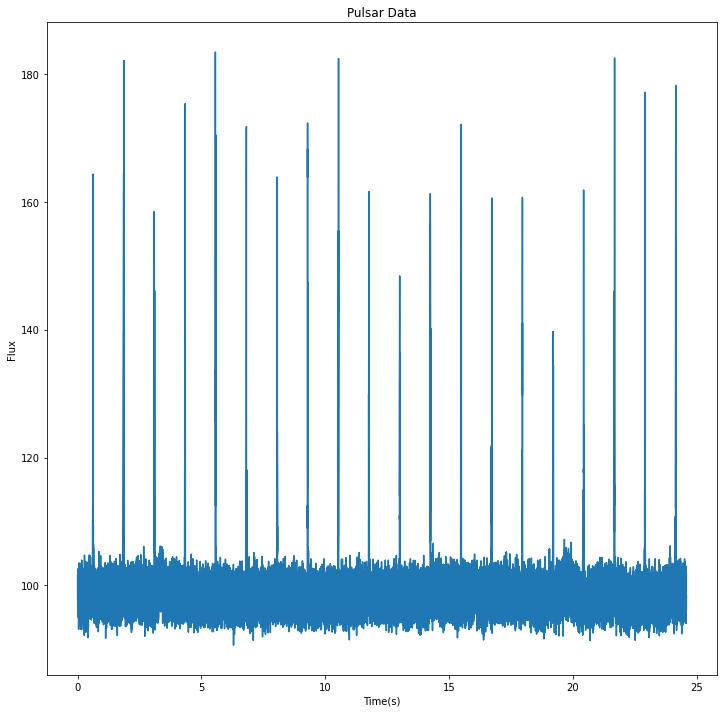

In [ ]:
xdata=f[:100000,0]
ydata=f[:100000,1]
plt.figure(figsize=(12,12))
plt.plot(xdata,ydata)
plt.ylabel("Flux")
plt.xlabel("Time(s)")
plt.title("Pulsar Data")
#plt.savefig("p.pdf")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


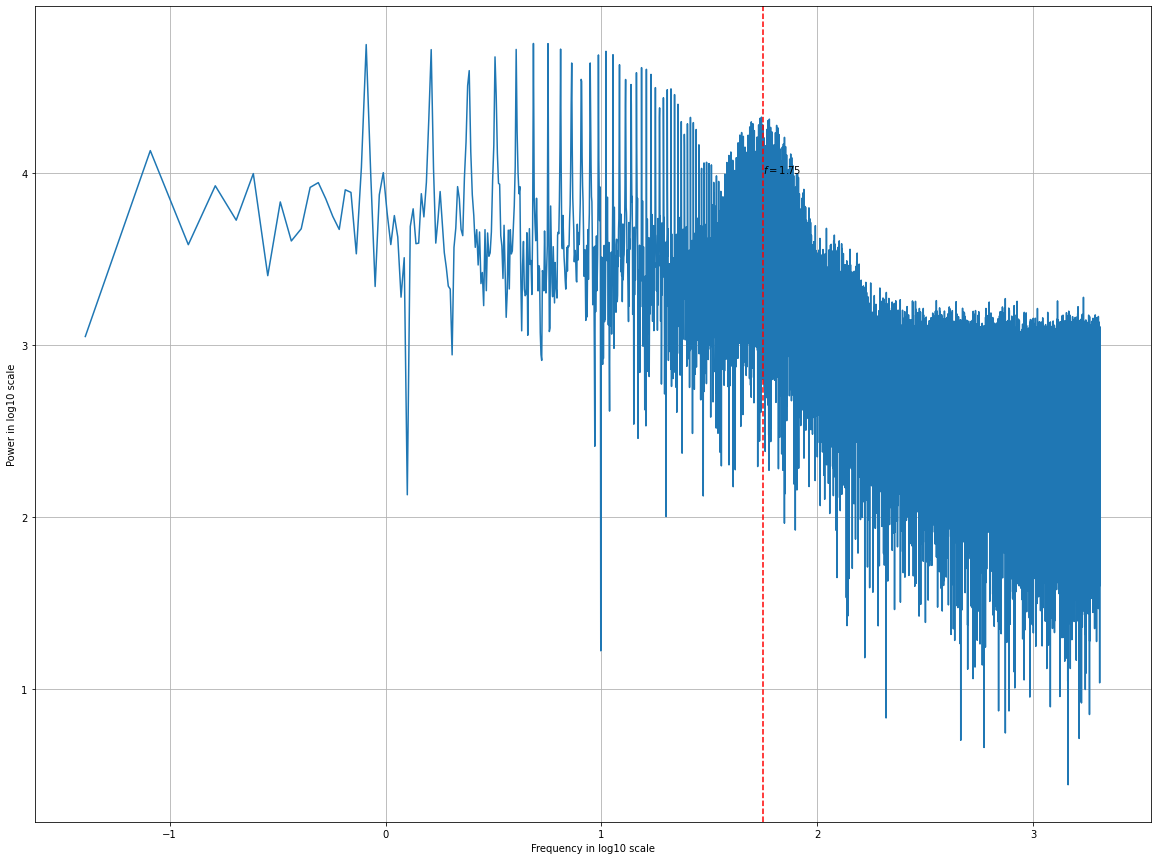

In [ ]:
n=len(ydata) #total no. of data points
s_r=100000/2.457575424000000197e+01   #sample rate
xf=rfftfreq(n,1/s_r)
yf=rfft(ydata)
xlog=np.log10(xf)
ylog=np.log10(yf)
plt.figure(figsize=(20,15))
plt.plot(xlog,ylog)
plt.grid()
plt.ylabel("Power in log10 scale")
plt.xlabel("Frequency in log10 scale")
#for 
plt.axvline(x=1.75,ls="--",color="r")
plt.text(1.75,4,"$f=1.75$",color="k")
plt.savefig("f.pdf")




/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:486: ComplexWarning: Casting complex values to real discards the imaginary part
  a = asarray(a, dtype=dtype, order=order)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


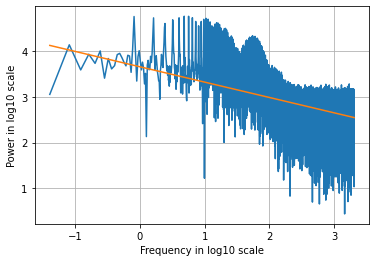

In [ ]:
def lin(x,m,c):
  return m*x+c
x1=xlog[1:] #removing the nan or o values
y1=ylog[1:] 
popt,pcov=curve_fit(lin,x1,y1) 
m_opt,c_opt=popt 
ymod=lin(x1,m_opt,c_opt)
plt.plot(xlog,ylog)  # for removing the trend we are plotting the st.line and then subtracting the y values
plt.plot(x1,ymod)
plt.grid()
plt.ylabel("Power in log10 scale")
plt.xlabel("Frequency in log10 scale")
plt.savefig("f1.pdf")

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


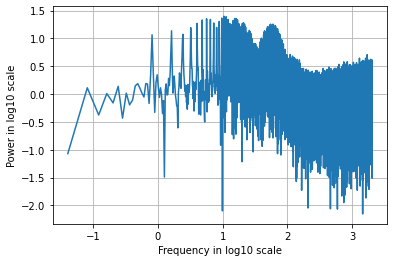

In [ ]:
y=(y1-ymod)  #removing the trend
plt.grid()
plt.ylabel("Power in log10 scale")
plt.xlabel("Frequency in log10 scale")
plt.plot(x1,y)
plt.savefig("f2.pdf")

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:486: ComplexWarning: Casting complex values to real discards the imaginary part
  a = asarray(a, dtype=dtype, order=order)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


(1.0, 3.0)

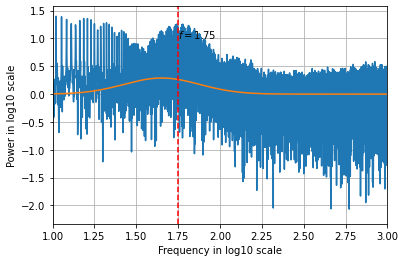

In [ ]:
def gauss(x,a,mu,sig):         #function for fitting using  gaussian func

  return a*np.exp((-(x-mu)**2)/(sig**2))
def laurentzian(x,xo,G):
  return (1/np.pi)*((G/2)/(((x-xo)**2)+(G/2)**2))
popt,pcov=curve_fit(gauss,x1,y) 
a_opt,mu_opt,sig_opt=popt 
ymod1=gauss(x1,a_opt,mu_opt,sig_opt)
popt,pcov=curve_fit(laurentzian,x1,y) 
xo_opt,G_opt=popt 
ymod2=laurentzian(x1,xo_opt,G_opt)
plt.plot(x1,y)  # for removing the trend we are plotting the st.line and then subtracting the y values
plt.plot(x1,ymod1)
plt.grid()
plt.ylabel("Power in log10 scale")
plt.xlabel("Frequency in log10 scale") 
plt.axvline(x=1.75,ls="--",color="r") 
plt.text(1.75,1,"$f=1.75$",color="k")
plt.savefig("f3m.pdf")
plt.xlim(1,3)